In [55]:
import pandas as pd 
df = pd.read_csv('resale_flat_prices_2017_onwards.csv')
df.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [56]:
#check for missing values 
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [57]:
#check for object types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108616 entries, 0 to 108615
Data columns (total 11 columns):
month                  108616 non-null object
town                   108616 non-null object
flat_type              108616 non-null object
block                  108616 non-null object
street_name            108616 non-null object
storey_range           108616 non-null object
floor_area_sqm         108616 non-null float64
flat_model             108616 non-null object
lease_commence_date    108616 non-null int64
remaining_lease        108616 non-null object
resale_price           108616 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 9.1+ MB


In [58]:
#26 different towns in the dataset
# len(df['town'].unique())
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [59]:
#7 different flat types
#len(df['flat_type'].unique())
df['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [60]:
#20 different flat models --> each of them correspond to a certain floor area size after searching on it 

# len(df['flat_model'].unique())
df['flat_model'].unique()

array(['Improved', 'New Generation', 'DBSS', 'Standard', 'Apartment',
       'Simplified', 'Model A', 'Premium Apartment', 'Adjoined flat',
       'Model A-Maisonette', 'Maisonette', 'Type S1', 'Type S2',
       'Model A2', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette',
       'Multi Generation', 'Premium Apartment Loft', '2-room'],
      dtype=object)

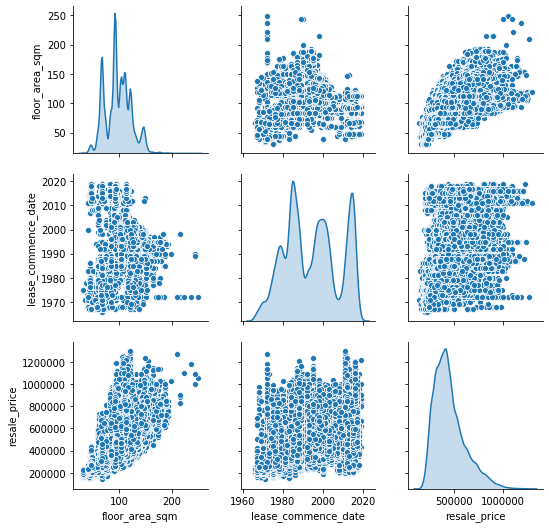

In [61]:
#1) positive correlation between floor_area and resale price 
#2) As lease commencement dates move from 1970 to 2020, general distribution of floor area gets smaller 
#3) Resale price and lease commencement date quite even distribtuion, with spikes in 1970s,1990s,2010s 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.pairplot(df, diag_kind='kde')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text xticklabel objects>)

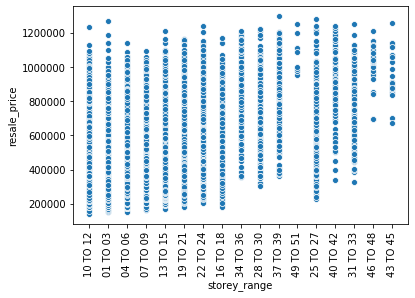

In [62]:
#In general, storey ranges up till 24 have quite even distribution in prices.
#However, as you venture into 30 floor ranges and above, starting prices are higher but max prices are about the same.
sns.scatterplot(df['storey_range'], df['resale_price'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

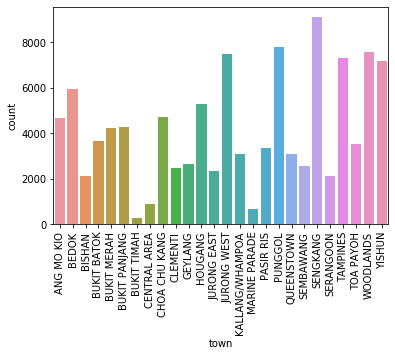

In [63]:
#sengkang has the most number of recorded resale transactions 
#and bukit timah being the lowest
sns.countplot(df['town'])
plt.xticks(rotation=90)

In [87]:
#Interestingly, Bukit Timah has the highest average resale price despite having lowest no. recorded transactions from 2017 to 2020
#Also, central area has third highest average resale price despite being third lowest no. of recorded transactions
df.groupby('town').resale_price.mean()

town
ANG MO KIO         414490.074430
BEDOK              423015.260189
BISHAN             644569.294419
BUKIT BATOK        392710.170278
BUKIT MERAH        571887.842102
BUKIT PANJANG      440643.238590
BUKIT TIMAH        719752.766667
CENTRAL AREA       634303.937570
CHOA CHU KANG      411603.528358
CLEMENTI           489835.035570
GEYLANG            445892.551633
HOUGANG            448821.063481
JURONG EAST        427710.511262
JURONG WEST        401504.741419
KALLANG/WHAMPOA    500935.740726
MARINE PARADE      522250.824666
PASIR RIS          508776.296176
PUNGGOL            470491.094333
QUEENSTOWN         586153.224439
SEMBAWANG          391821.934584
SENGKANG           451866.502982
SERANGOON          499533.100659
TAMPINES           486447.922972
TOA PAYOH          490042.645436
WOODLANDS          393095.640844
YISHUN             376526.702477
Name: resale_price, dtype: float64

In [96]:
df[df.values == 'BUKIT TIMAH'].describe()

,floor_area_sqm,lease_commence_date,resale_price
count,300.000000,300.000000,3.000000e+02
mean,110.863333,1983.806667,7.197528e+05
std,26.451533,6.611227,1.997866e+05
min,63.000000,1974.000000,3.000000e+05
25%,91.000000,1974.000000,5.737500e+05
50%,104.000000,1988.000000,7.180000e+05
75%,127.250000,1989.000000,8.835000e+05
max,154.000000,1989.000000,1.210000e+06


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

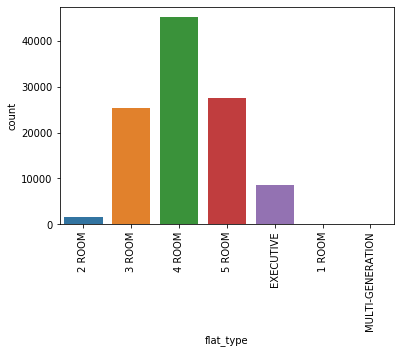

In [65]:
#4-room with the highest count and 3 & 5 room tied for second 
sns.countplot(df['flat_type'])
plt.xticks(rotation=90)



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

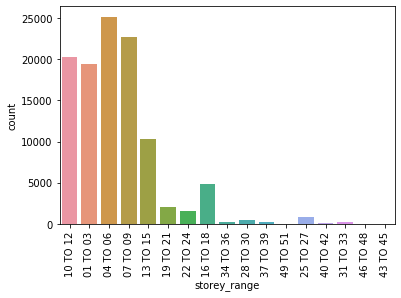

In [11]:
#4-6 storey range having highest no. of transactions recorded
sns.countplot(df['storey_range'])
plt.xticks(rotation=90)

 

In [12]:
#curious to find out most expensive resale transaction recorded 
df.iloc[df['resale_price'].idxmax()]

month                       2021-09
town                         BISHAN
flat_type                    5 ROOM
block                          273A
street_name            BISHAN ST 24
storey_range               37 TO 39
floor_area_sqm                  120
flat_model                     DBSS
lease_commence_date            2011
remaining_lease            89 years
resale_price              1.295e+06
Name: 106899, dtype: object

In [13]:
#as well as least expensive
df.iloc[df['resale_price'].idxmin()]

month                             2020-02
town                            TOA PAYOH
flat_type                          3 ROOM
block                                  26
street_name                TOA PAYOH EAST
storey_range                     10 TO 12
floor_area_sqm                         67
flat_model                       Improved
lease_commence_date                  1971
remaining_lease        49 years 11 months
resale_price                       140000
Name: 67560, dtype: object

In [14]:
#will not be one-hot encoding this as there will be 554 extra features
df['street_name'].value_counts()

YISHUN RING RD        1551
PUNGGOL DR            1276
BEDOK RESERVOIR RD    1216
PUNGGOL FIELD         1209
ANG MO KIO AVE 10     1104
                      ... 
SENG POH RD              3
KRETA AYER RD            3
ALJUNIED AVE 2           1
CANBERRA CRES            1
SEMBAWANG WAY            1
Name: street_name, Length: 554, dtype: int64

In [15]:
#Encoding 
df_encoded = pd.get_dummies(df, columns=['town', 'flat_type', 'flat_model'])
df_encoded.head(5)

,month,block,street_name,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,town_ANG MO KIO,town_BEDOK,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,2017-01,406,ANG MO KIO AVE 10,10 TO 12,44.0,1979,61 years 04 months,232000.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-01,108,ANG MO KIO AVE 4,01 TO 03,67.0,1978,60 years 07 months,250000.0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,2017-01,602,ANG MO KIO AVE 5,01 TO 03,67.0,1980,62 years 05 months,262000.0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,2017-01,465,ANG MO KIO AVE 10,04 TO 06,68.0,1980,62 years 01 month,265000.0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,2017-01,601,ANG MO KIO AVE 5,01 TO 03,67.0,1980,62 years 05 months,265000.0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [16]:
#next, handle month column 
df_encoded['date'] = pd.to_datetime(df_encoded['month'])
df_encoded['month'] = df_encoded['date'].apply(lambda date:date.month)
df_encoded['year'] = df_encoded['date'].apply(lambda date:date.year)
df_encoded.head(5)

,month,block,street_name,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,town_ANG MO KIO,town_BEDOK,...,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,date,year
0,1,406,ANG MO KIO AVE 10,10 TO 12,44.0,1979,61 years 04 months,232000.0,1,0,...,0,0,0,0,0,0,0,0,2017-01-01,2017
1,1,108,ANG MO KIO AVE 4,01 TO 03,67.0,1978,60 years 07 months,250000.0,1,0,...,0,0,0,0,0,0,0,0,2017-01-01,2017
2,1,602,ANG MO KIO AVE 5,01 TO 03,67.0,1980,62 years 05 months,262000.0,1,0,...,0,0,0,0,0,0,0,0,2017-01-01,2017
3,1,465,ANG MO KIO AVE 10,04 TO 06,68.0,1980,62 years 01 month,265000.0,1,0,...,0,0,0,0,0,0,0,0,2017-01-01,2017
4,1,601,ANG MO KIO AVE 5,01 TO 03,67.0,1980,62 years 05 months,265000.0,1,0,...,0,0,0,0,0,0,0,0,2017-01-01,2017


In [17]:
#handle storey range 
df_encoded['storey_range'] = df_encoded['storey_range'].apply(lambda storey_range:storey_range[:2])
df_encoded.head(5)

,month,block,street_name,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,town_ANG MO KIO,town_BEDOK,...,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,date,year
0,1,406,ANG MO KIO AVE 10,10,44.0,1979,61 years 04 months,232000.0,1,0,...,0,0,0,0,0,0,0,0,2017-01-01,2017
1,1,108,ANG MO KIO AVE 4,01,67.0,1978,60 years 07 months,250000.0,1,0,...,0,0,0,0,0,0,0,0,2017-01-01,2017
2,1,602,ANG MO KIO AVE 5,01,67.0,1980,62 years 05 months,262000.0,1,0,...,0,0,0,0,0,0,0,0,2017-01-01,2017
3,1,465,ANG MO KIO AVE 10,04,68.0,1980,62 years 01 month,265000.0,1,0,...,0,0,0,0,0,0,0,0,2017-01-01,2017
4,1,601,ANG MO KIO AVE 5,01,67.0,1980,62 years 05 months,265000.0,1,0,...,0,0,0,0,0,0,0,0,2017-01-01,2017


In [18]:
#handle remaining lease
df_encoded['remaining_lease'] = df_encoded['remaining_lease'].apply(lambda remaining_lease:remaining_lease[:2])
df_encoded.head(5)

,month,block,street_name,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,town_ANG MO KIO,town_BEDOK,...,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,date,year
0,1,406,ANG MO KIO AVE 10,10,44.0,1979,61,232000.0,1,0,...,0,0,0,0,0,0,0,0,2017-01-01,2017
1,1,108,ANG MO KIO AVE 4,01,67.0,1978,60,250000.0,1,0,...,0,0,0,0,0,0,0,0,2017-01-01,2017
2,1,602,ANG MO KIO AVE 5,01,67.0,1980,62,262000.0,1,0,...,0,0,0,0,0,0,0,0,2017-01-01,2017
3,1,465,ANG MO KIO AVE 10,04,68.0,1980,62,265000.0,1,0,...,0,0,0,0,0,0,0,0,2017-01-01,2017
4,1,601,ANG MO KIO AVE 5,01,67.0,1980,62,265000.0,1,0,...,0,0,0,0,0,0,0,0,2017-01-01,2017


In [19]:
#drop some columns 
df_drop = df_encoded.drop(columns=['month', 'block', 'street_name', 'date'])
df_drop.head(5)

,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,...,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,year
0,10,44.0,1979,61,232000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
1,01,67.0,1978,60,250000.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2017
2,01,67.0,1980,62,262000.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2017
3,04,68.0,1980,62,265000.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2017
4,01,67.0,1980,62,265000.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2017


In [20]:
#creating train-test sets 
X = df_drop.drop('resale_price',axis =1).values
y = df_drop['resale_price'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [21]:
#next, scaling the data 
import numpy as np
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [22]:
#now we will test using different models 
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth=25, n_estimators=100)       
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

In [24]:
#calculate rmse 
from sklearn import metrics 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 35149.808780724474


In [97]:
#calculate r2 value
rf_reg.score(X_test, y_test)

0.9504002914078494

In [25]:
#next try XGBoost 
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train, verbose=False)

preds = my_model.predict(X_test)

In [26]:
#calculate rmse 
from sklearn import metrics 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

RMSE: 34822.21008534086


In [86]:
#calculate r2 value
my_model.score(X_test, y_test)

0.9513205285532205

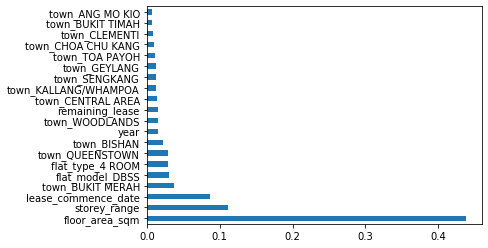

In [79]:
#feature importance --->it would seem that top3 features are lease commence date, storey range and floor area sqm
data = df_drop.drop('resale_price', axis=1)
feat_importances = pd.Series(rf_reg.feature_importances_, index=data.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
#Conclusion

#Floor area, storey range and lease commence date appears to be the main driving factors of HDB prices. 